## Milestone 5

### SQL and JOIN

In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np

In [2]:
# Import previously created datasets
mle_status = pd.read_csv('dsc540_mlestatus.csv')
gbif = pd.read_csv('dsc540_gbif.csv')

In [3]:
mle_status.head()

,common_name,scientific_name,MLE_combined,MLE_male,MLE_female,status
0,Aardvark,Orycteropus afer,-,NaN,11.5,Least Concern
1,Addax,Addax nasomaculatus,-,10.7,13.9,Endangered
2,"Agouti, Brazilian",Dasyprocta leporina,8.2,-,-,Least Concern
3,"Alligator, Chinese",Alligator sinensis,25,-,-,Endangered
4,"Anoa, Lowland",Bubalus depressicornis,17.4,-,-,Endangered


In [4]:
gbif.head()
# I'm realizing now that I need to change the column header for 'species' to 'scientific_name' since that is my column in common
# between the datasets.

,occurrenceStatus,species,country,locality,year,month,day
0,PRESENT,Orycteropus afer,Kenya,Marsabit Forest Ecosystem,2014,9,30
1,PRESENT,Orycteropus afer,Unknown,Unknown,0,0,0
2,PRESENT,Orycteropus afer,Germany,Germany,0,0,0
3,PRESENT,Orycteropus afer,South Africa,South Africa,0,0,0
4,PRESENT,Orycteropus afer,Niger,"Say, Parc W",2015,4,8


In [5]:
gbif = gbif.rename(columns = {'species' : 'scientific_name'})

In [6]:
# Upload to SQL. I found this on the SQLite docs. It was surprisingly easy! I'm starting to understand the application of SQL
# better although some of the larger concepts are still confusing.
con = sql.connect('aza_data')
mle_status.to_sql('mle_status', con=con)
gbif.to_sql('gbif', con=con)

In [7]:
# The first iteration I did of this code, I had 'FROM gbif JOIN mle_status...'. I didn't like the order that the columns were in.
# I was going to manually rearrange them but I realized that they were probably in that order because of the order of commands I
# put in for the join. Switching which table was called first solved that problem exactly.
#
# I only needed to do one join because I had joined the original AZA list of animals with the Endangered Status during Milestone 3.

with sql.connect('aza_data') as conn:
    cursor = conn.cursor()
    aza_df = pd.DataFrame(cursor.execute('SELECT* FROM mle_status JOIN gbif ON mle_status.scientific_name = gbif.scientific_name'))

In [34]:
aza_df.head()

,common_name,scientific_name,MLE_combined,MLE_male,MLE_female,status,occurrenceStatus,country,locality,year,month,day
0,Aardvark,Orycteropus afer,NaN,NaN,11.5,Least Concern,PRESENT,Kenya,Marsabit Forest Ecosystem,2014,9,30
1,Aardvark,Orycteropus afer,NaN,NaN,11.5,Least Concern,PRESENT,Unknown,Unknown,0,0,0
2,Aardvark,Orycteropus afer,NaN,NaN,11.5,Least Concern,PRESENT,Germany,Germany,0,0,0
3,Aardvark,Orycteropus afer,NaN,NaN,11.5,Least Concern,PRESENT,South Africa,South Africa,0,0,0
4,Aardvark,Orycteropus afer,NaN,NaN,11.5,Least Concern,PRESENT,Niger,"Say, Parc W",2015,4,8


In [9]:
# The first and seventh columns with the index numbers is unneccesary, as is the duplicate column of scientific_name in column 9.
#  Also, I guess because of the join method it doesn't matter that I changed the column names. It didn't merge the scientific_name
# columns together. I think that would be something that happened with a different join, but this works.
aza_df = aza_df.drop([0, 7, 9], axis = 1)

In [10]:
aza_df.head()

,1,2,3,4,5,6,8,10,11,12,13,14
0,Aardvark,Orycteropus afer,-,None,11.5,Least Concern,PRESENT,Kenya,Marsabit Forest Ecosystem,2014,9,30
1,Aardvark,Orycteropus afer,-,None,11.5,Least Concern,PRESENT,Unknown,Unknown,0,0,0
2,Aardvark,Orycteropus afer,-,None,11.5,Least Concern,PRESENT,Germany,Germany,0,0,0
3,Aardvark,Orycteropus afer,-,None,11.5,Least Concern,PRESENT,South Africa,South Africa,0,0,0
4,Aardvark,Orycteropus afer,-,None,11.5,Least Concern,PRESENT,Niger,"Say, Parc W",2015,4,8


In [11]:
# I need to rename the column headers in order to work with the data easier.
columns = {1: 'common_name', 2: 'scientific_name', 3: 'MLE_combined', 4: 'MLE_male', 5: 'MLE_female', 6: 'status', 8: 'occurrenceStatus',
           10: 'country', 11: 'locality', 12: 'year', 13: 'month', 14: 'day'}
aza_df = aza_df.rename(columns, axis = 1)

In [12]:
aza_df.head()

,common_name,scientific_name,MLE_combined,MLE_male,MLE_female,status,occurrenceStatus,country,locality,year,month,day
0,Aardvark,Orycteropus afer,-,None,11.5,Least Concern,PRESENT,Kenya,Marsabit Forest Ecosystem,2014,9,30
1,Aardvark,Orycteropus afer,-,None,11.5,Least Concern,PRESENT,Unknown,Unknown,0,0,0
2,Aardvark,Orycteropus afer,-,None,11.5,Least Concern,PRESENT,Germany,Germany,0,0,0
3,Aardvark,Orycteropus afer,-,None,11.5,Least Concern,PRESENT,South Africa,South Africa,0,0,0
4,Aardvark,Orycteropus afer,-,None,11.5,Least Concern,PRESENT,Niger,"Say, Parc W",2015,4,8


In [13]:
# After discovering the discrepencies in my other table, I decided to convert the MLE data here as well.
aza_df = aza_df.replace('-', np.nan)
aza_df = aza_df.replace('None', np.nan)
aza_df = aza_df.replace('See Full Repo', np.nan)

aza_df['MLE_combined'] = aza_df['MLE_combined'].astype(float)
aza_df['MLE_male'] = aza_df['MLE_male'].astype(float)
aza_df['MLE_female'] = aza_df['MLE_female'].astype(float)

In [14]:
# I wanted to see how many total rows are in the new dataframe so I used shape.
aza_df.shape

(5855, 12)

### VISUALIZATIONS

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sb

%matplotlib inline

In [16]:
# This table has the unique information for each species regarding MLE (median life expectancy) and Endangered Species Status.
# There is one row per species versus the joined table which has one row per occurrence. 

with sql.connect('aza_data') as conn:
    cursor = conn.cursor()
    mlestat_df = pd.DataFrame(cursor.execute('SELECT* FROM mle_status'))

In [17]:
# Clean up the dataframe like I did with the joined one.
mlestat_df = mlestat_df.drop([0], axis=1)
col2 = {1: 'common_name', 2: 'scientific_name', 3: 'MLE_combined', 4: 'MLE_male', 5: 'MLE_female', 6: 'status'}
mlestat_df = mlestat_df.rename(col2, axis=1)
mlestat_df.head()

,common_name,scientific_name,MLE_combined,MLE_male,MLE_female,status
0,Aardvark,Orycteropus afer,-,None,11.5,Least Concern
1,Addax,Addax nasomaculatus,-,10.7,13.9,Endangered
2,"Agouti, Brazilian",Dasyprocta leporina,8.2,-,-,Least Concern
3,"Alligator, Chinese",Alligator sinensis,25,-,-,Endangered
4,"Anoa, Lowland",Bubalus depressicornis,17.4,-,-,Endangered


In [18]:
# I don't know why I didn't replace the '-' in this data with NaN earlier. I also don't know why SQL changed the 'NaNs' that were
# there to 'None' (see first row).

mlestat_df = mlestat_df.replace('-', np.nan)
mlestat_df = mlestat_df.replace('None', np.nan)
mlestat_df = mlestat_df.replace('See Full Repo', np.nan)

In [19]:
# I was getting errors that indicated that the numbers in the MLE columns may have been written as strings. So I converted them
# all to floats.
mlestat_df['MLE_combined'] = mlestat_df['MLE_combined'].astype(float)
mlestat_df['MLE_male'] = mlestat_df['MLE_male'].astype(float)
mlestat_df['MLE_female'] = mlestat_df['MLE_female'].astype(float)

In [20]:
# I'm going to subset each category of Endangered Status into smaller dataframes so that I can plot histograms of MLE frequency
# according to each type.
least = mlestat_df[mlestat_df.status == 'Least Concern']
threat = mlestat_df[mlestat_df.status == 'Threatened']
endangered = mlestat_df[mlestat_df.status == 'Endangered']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

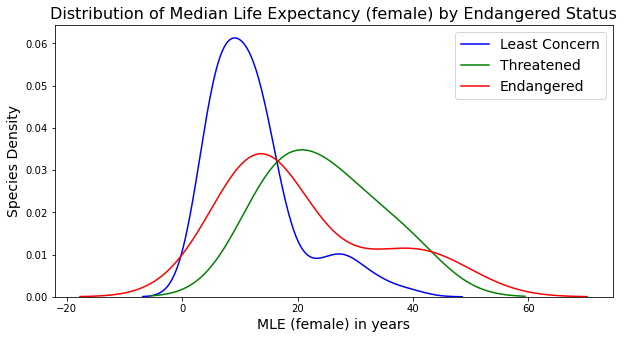

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

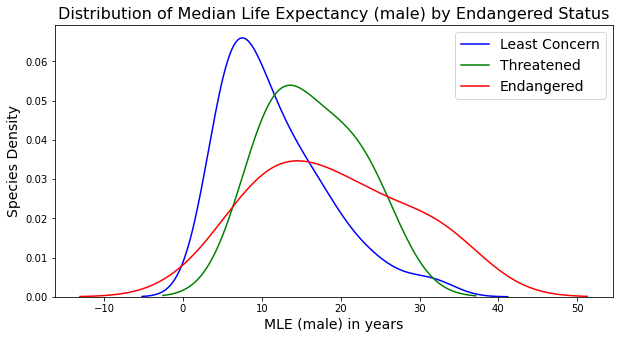

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

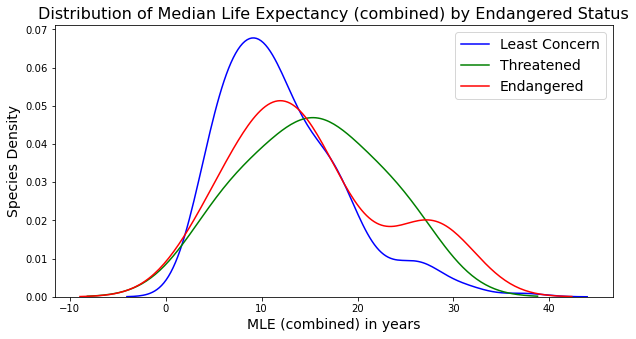

In [21]:
# I want to show the MLE compared to the endangered status across all species. I played around with a few different attempts 
# before finding some good documentation to walk me through creating multiple density curves.

plt.figure(figsize=(10, 5))

sb.distplot(least['MLE_female'], hist = False, kde = True, label='Least Concern', color = 'blue')
sb.distplot(threat['MLE_female'], hist = False, kde = True, label='Threatened', color = 'green')
sb.distplot(endangered['MLE_female'], hist = False, kde = True, label='Endangered', color = 'red')

plt.xlabel('MLE (female) in years', fontsize = 14)
plt.ylabel('Species Density', fontsize = 14)
plt.legend(fontsize = 14)
plt.title('Distribution of Median Life Expectancy (female) by Endangered Status', fontsize = 16)
plt.show()

plt.figure(figsize=(10, 5))

sb.distplot(least['MLE_male'], hist = False, kde = True, label='Least Concern', color = 'blue')
sb.distplot(threat['MLE_male'], hist = False, kde = True, label='Threatened', color = 'green')
sb.distplot(endangered['MLE_male'], hist = False, kde = True, label='Endangered', color = 'red')

plt.xlabel('MLE (male) in years', fontsize = 14)
plt.ylabel('Species Density', fontsize = 14)
plt.legend(fontsize = 14)
plt.title('Distribution of Median Life Expectancy (male) by Endangered Status', fontsize = 16)
plt.show()

plt.figure(figsize=(10, 5))

sb.distplot(least['MLE_combined'], hist = False, kde = True, label='Least Concern', color = 'blue')
sb.distplot(threat['MLE_combined'], hist = False, kde = True, label='Threatened', color = 'green')
sb.distplot(endangered['MLE_combined'], hist = False, kde = True, label='Endangered', color = 'red')

plt.xlabel('MLE (combined) in years', fontsize = 14)
plt.ylabel('Species Density', fontsize = 14)
plt.legend(fontsize = 14)
plt.title('Distribution of Median Life Expectancy (combined) by Endangered Status', fontsize = 16)
plt.show()

In [22]:
# I want to look at the number of times each animal has a reported appearance in the database. So, I made a list of the unique
# species names then took the length of the column (aka the number of rows) for each species name. Then I turned the two lists
# into a new dataframe.

unique_names = mlestat_df.scientific_name.unique()

lengths = []

for name in unique_names:
    lengths.append(len(aza_df[aza_df['scientific_name'].str.contains(name)]))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [23]:
occur = pd.DataFrame({'scientific_name' : unique_names, 'num_occur' : lengths})

In [24]:
occur.head()

,scientific_name,num_occur
0,Orycteropus afer,20
1,Addax nasomaculatus,19
2,Dasyprocta leporina,20
3,Alligator sinensis,20
4,Bubalus depressicornis,20


(-2.0, 22.0)

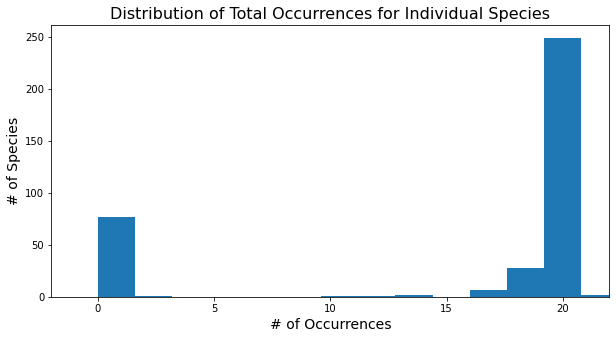

In [25]:
# I wanted to do a pie chart to see how many times in the total each species occurs, but there are too many different species.
# I made a histogram instead, which shows the frequency of the number of occurrences. 

plt.figure(figsize=(10, 5))

plt.hist(occur['num_occur'], bins=50)
plt.xlabel('# of Occurrences', fontsize = 14)
plt.ylabel('# of Species', fontsize = 14)
plt.title('Distribution of Total Occurrences for Individual Species', fontsize = 16)
plt.xlim(-2, 22)

There are 371 different species in my final dataframe. I wanted to compare the number of occurrences of all 371 species but since the total number of occurrences is 5855 across 371 species, that is too much for a clean visual. Instead, I'm going to act as if I'm comparing specific individual species to others. The comparison I want to look at will be the seven species of lemur. I want to compare how many occurrences were witnessed for each of these species.

In [26]:
# I want to look at the number of occurrences for each of the seven species of lemurs.
# Create subset dataframe with just the information for the lemur species.

names = ('Varecia variegata', 'Eulemur collaris', 'Eulemur coronatus', 'Eulemur mongoz', 'Microcebus murinus', 'Varecia rubra', 
         'Lemur catta')
lemur = aza_df[aza_df['scientific_name'].isin(names)]

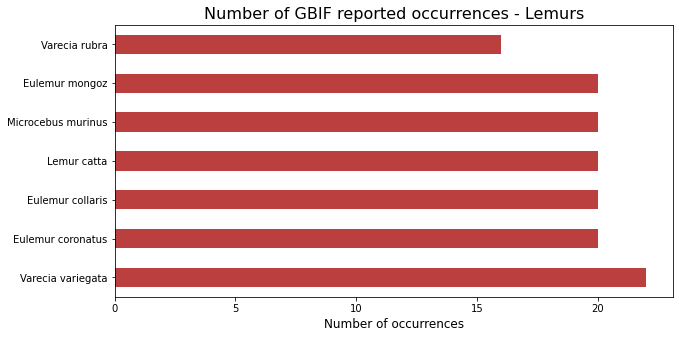

In [27]:
# This figure shows the number of occurrences for each species of lemur reported to GBIF.
plt.figure(figsize=(10, 5))

lemur['scientific_name'].value_counts().plot(kind='barh', color='#bb3f3f')
plt.xlabel('Number of occurrences', fontsize = 12)
plt.title('Number of GBIF reported occurrences - Lemurs', fontsize = 16)
plt.show()

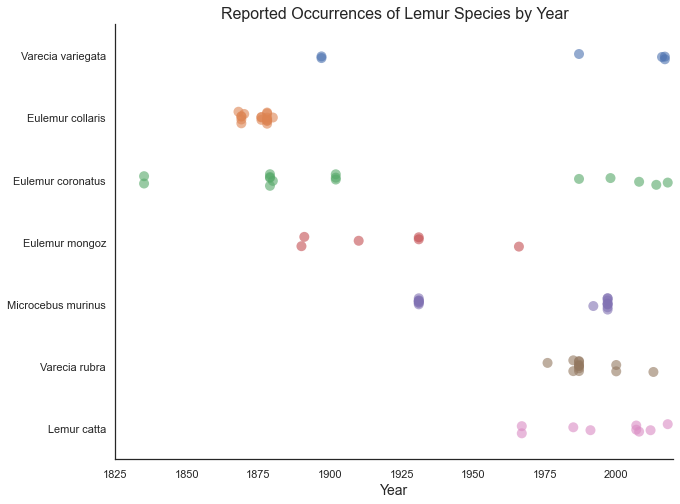

In [28]:
# I wanted to do a scatter plot showing in what years each lemur species identification occurred. I tried to do it with
# just matplotlib first, but I needed seaborn for the jitter.
plt.figure(figsize=(10, 8))

sb.set(style="white", color_codes=True)
sb.stripplot(x='year', y='scientific_name', data=lemur, jitter=True, alpha=0.6, size=10)
sb.despine()
plt.xlabel('Year', fontsize=14)
plt.ylabel('')
plt.title('Reported Occurrences of Lemur Species by Year', fontsize=16)
plt.xlim(1825, 2020)
plt.show()

In [29]:
# Now I am going to do what I tried to do before with the larger dataset and make a pie chart showing the distribution of 
# occurrences for the lemurs. Our previous exercises provided helpful guidance for this step.
lnames = lemur.scientific_name.unique()

lem_len = []

for name in lnames:
    lem_len.append(len(lemur[lemur['scientific_name'].str.contains(name)]))

In [30]:
lem_occur = pd.DataFrame({'scientific_name' : lnames, 'num_occur' : lem_len})

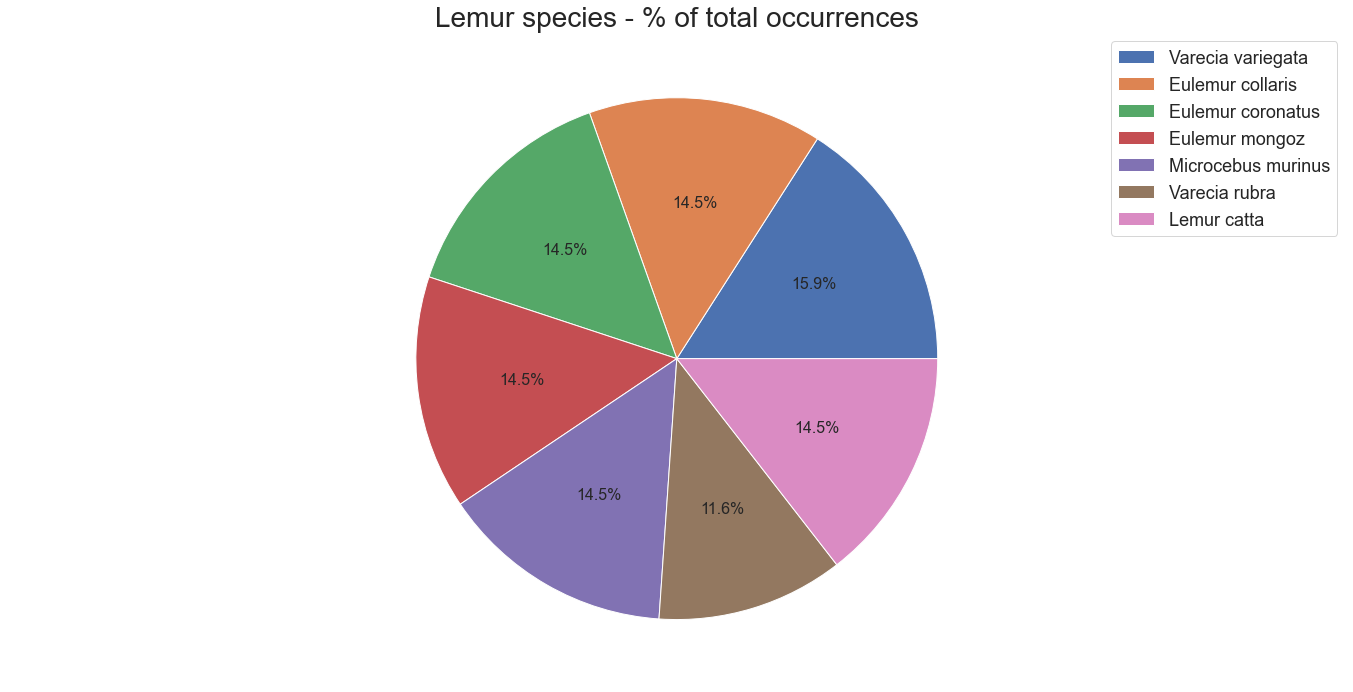

In [33]:
labels = lem_occur['scientific_name']

numbers = lem_occur['num_occur']
fig, ax1 = plt.subplots(figsize = (24,12))
ax1.axis('equal')
wedges, texts, autotexts = ax1.pie(numbers, autopct='%.1f%%')

plt.setp(autotexts, size=16)
ax1.legend(labels, loc = 'upper right', fontsize = 18) 
plt.title('Lemur species - % of total occurrences', fontsize = 28)
plt.show()

### SUMMARY

This project was incredibly helpful and educational for me. Although some of the concepts presented had been brought up in past courses, we went into more depth and I was able to better understand the application of tools such as matplotlib and SQL. This process has also taught me that I enjoy the data wrangling part of data science more than some of the other aspects, such as building algorithms. I am detail-oriented by nature so it makes sense to me to go through data with a fine-toothed comb to pull out relevant information and make sure the data is clean.

The most challenging part of this project was figuring out what to do with my data. It is one thing to go through homework exercises that tell you what to look for and the types of visualizations to create. It is a whole different set of hurdles to figure those things out for yourself. I tried to keep some end goals in mind to help direct me (such as wanting to see if there was any relationship between the Endangered Species Status and the number of occurrences reported in the GBIF database). Despite how long it took me to accomplish parts of the project, I enjoyed the process. Looking at my data here at its final stage, I can see where, if this were an actual project for an organization, I would need to go back and redo some of my data collection.

SQL, in particular, was a brand-new concept for me. Conceptually, I still have a slight gap in my knowledge for the utilization of SQL in a real-world scenario. However, the process of using it makes much more sense to me now. Going forward, I would like to find more resources to help me better understand SQL as well as how to choose visualizations. I would also like to develop my visualization techniques in more areas, such as Tableau/PowerBI.